In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("live-birth.csv", thousands=",") #header=None, 
df.head()

,Data Series,2021 2Q,2021 1Q,2020 4Q,2020 3Q,2020 2Q,2020 1Q,2019 4Q,2019 3Q,2019 2Q,...,1988 2Q,1988 1Q,1987 4Q,1987 3Q,1987 2Q,1987 1Q,1986 4Q,1986 3Q,1986 2Q,1986 1Q
0,Total Live-Births By Birth Order,9411,8894,9808,9836,9543,9403,10327,10063,9487,...,12068,11127,12843,11724,10488,8834,10239,9854,9353,9954
1,1st Live-Birth,4298,4097,4722,4762,4499,4431,4901,4812,4384,...,4426,4374,4928,4532,4306,4007,4782,4398,4186,4414
2,2nd Live-Birth,3459,3220,3451,3330,3320,3269,3689,3493,3387,...,4645,4032,4966,4492,3942,3053,3423,3475,3367,3553
3,3rd Live-Birth,1140,1093,1133,1174,1186,1141,1227,1191,1175,...,2265,2002,2195,1940,1623,1234,1454,1395,1271,1433
4,4th Live-Birth,339,326,323,381,359,352,343,386,336,...,485,434,425,458,395,320,351,359,332,316


In [3]:
births_df = df.T
births_df.columns = births_df.iloc[0]
births_df = births_df[1:]
births_df["Quarter"] = births_df.index
births_df = births_df.iloc[::-1]
no_of_rows = len(births_df.index)
print(no_of_rows)
# only plot half of the data so i can see better
births_df = births_df.iloc[0:int(no_of_rows)]
births_df.head()


142


Data Series,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
1986 1Q,9954,4414,3553,1433,316,103,61,1986 1Q
1986 2Q,9353,4186,3367,1271,332,87,50,1986 2Q
1986 3Q,9854,4398,3475,1395,359,98,44,1986 3Q
1986 4Q,10239,4782,3423,1454,351,98,51,1986 4Q
1987 1Q,8834,4007,3053,1234,320,81,56,1987 1Q


In [4]:
births_df["Date"] = (pd.PeriodIndex(births_df["Quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2'), freq='Q').to_timestamp())

births_df.head()


/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_31507/687703673.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  births_df["Date"] = (pd.PeriodIndex(births_df["Quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2'), freq='Q').to_timestamp())


Data Series,Total Live-Births By Birth Order,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter,Date
1986 1Q,9954,4414,3553,1433,316,103,61,1986 1Q,1986-01-01
1986 2Q,9353,4186,3367,1271,332,87,50,1986 2Q,1986-04-01
1986 3Q,9854,4398,3475,1395,359,98,44,1986 3Q,1986-07-01
1986 4Q,10239,4782,3423,1454,351,98,51,1986 4Q,1986-10-01
1987 1Q,8834,4007,3053,1234,320,81,56,1987 1Q,1987-01-01


In [5]:
births_df["Total Live-Births By Birth Order"] = pd.to_numeric(births_df["Total Live-Births By Birth Order"])
births_df.dtypes


Data Series
Total Live-Births By Birth Order             int64
  1st Live-Birth                            object
  2nd Live-Birth                            object
  3rd Live-Birth                            object
  4th Live-Birth                            object
  5th Live-Birth                            object
  6th Live-Birth & Over                     object
Quarter                                     object
Date                                datetime64[ns]
dtype: object

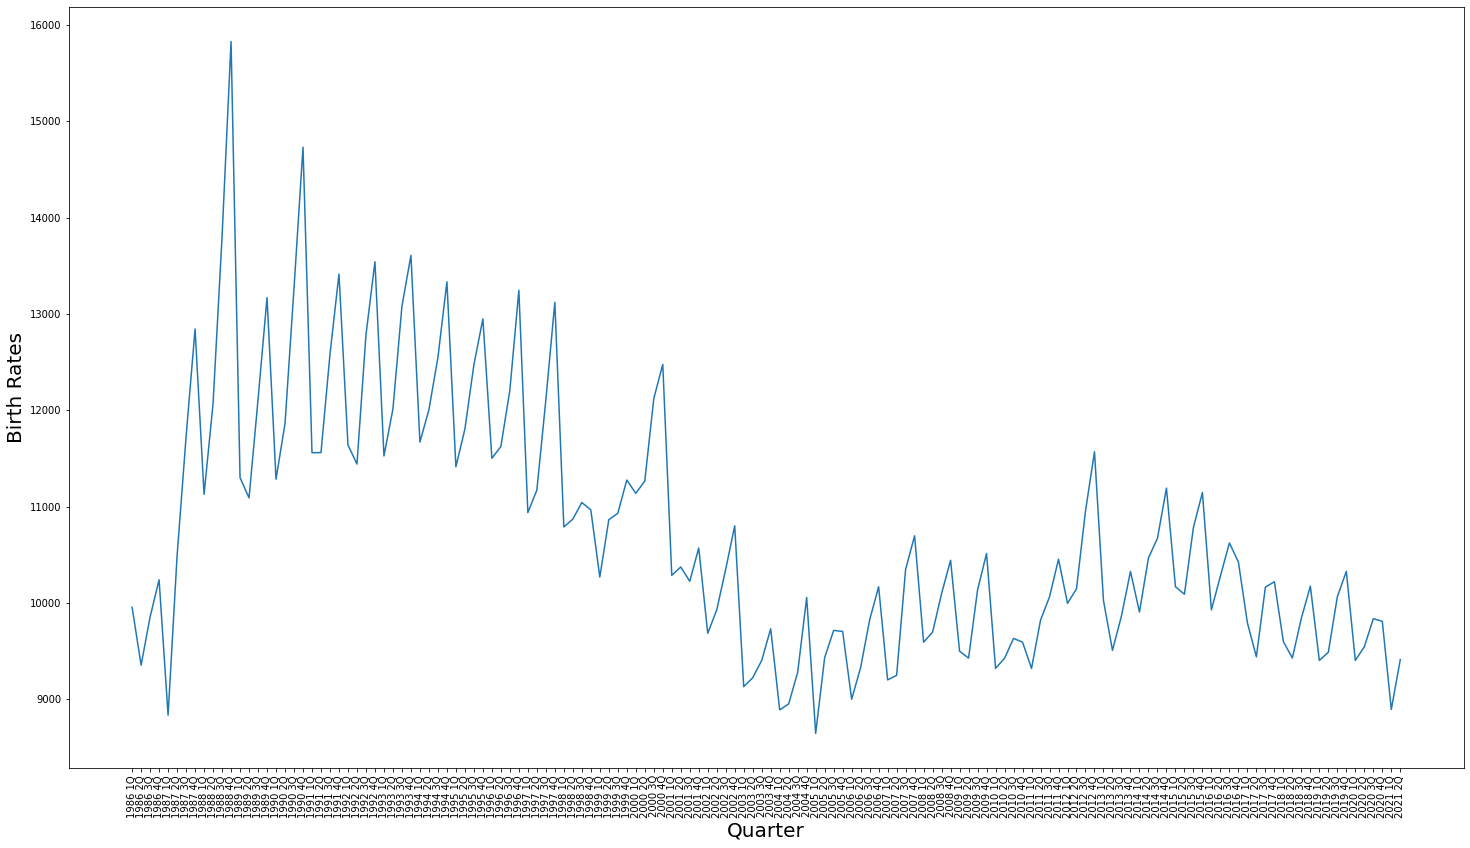

In [8]:
plt.figure(figsize=(25,14))
plt.plot(births_df.Quarter, births_df["Total Live-Births By Birth Order"])
plt.xlabel("Quarter", fontsize=20)
plt.ylabel("Birth Rates", fontsize=20)
plt.xticks(rotation=90)
plt.show()

/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_31507/1733189575.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(births_df.index, Rotation=90)
/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_31507/1733189575.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(births_df.index, Rotation=90)


[Text(0, 0, '1986 1Q'),
 Text(1, 0, '1986 2Q'),
 Text(2, 0, '1986 3Q'),
 Text(3, 0, '1986 4Q'),
 Text(4, 0, '1987 1Q'),
 Text(5, 0, '1987 2Q'),
 Text(6, 0, '1987 3Q'),
 Text(7, 0, '1987 4Q'),
 Text(8, 0, '1988 1Q'),
 Text(9, 0, '1988 2Q'),
 Text(10, 0, '1988 3Q'),
 Text(11, 0, '1988 4Q'),
 Text(12, 0, '1989 1Q'),
 Text(13, 0, '1989 2Q'),
 Text(14, 0, '1989 3Q'),
 Text(15, 0, '1989 4Q'),
 Text(16, 0, '1990 1Q'),
 Text(17, 0, '1990 2Q'),
 Text(18, 0, '1990 3Q'),
 Text(19, 0, '1990 4Q'),
 Text(20, 0, '1991 1Q'),
 Text(21, 0, '1991 2Q'),
 Text(22, 0, '1991 3Q'),
 Text(23, 0, '1991 4Q'),
 Text(24, 0, '1992 1Q'),
 Text(25, 0, '1992 2Q'),
 Text(26, 0, '1992 3Q'),
 Text(27, 0, '1992 4Q'),
 Text(28, 0, '1993 1Q'),
 Text(29, 0, '1993 2Q'),
 Text(30, 0, '1993 3Q'),
 Text(31, 0, '1993 4Q'),
 Text(32, 0, '1994 1Q'),
 Text(33, 0, '1994 2Q'),
 Text(34, 0, '1994 3Q'),
 Text(35, 0, '1994 4Q'),
 Text(36, 0, '1995 1Q'),
 Text(37, 0, '1995 2Q'),
 Text(38, 0, '1995 3Q'),
 Text(39, 0, '1995 4Q'),
 Text(40, 

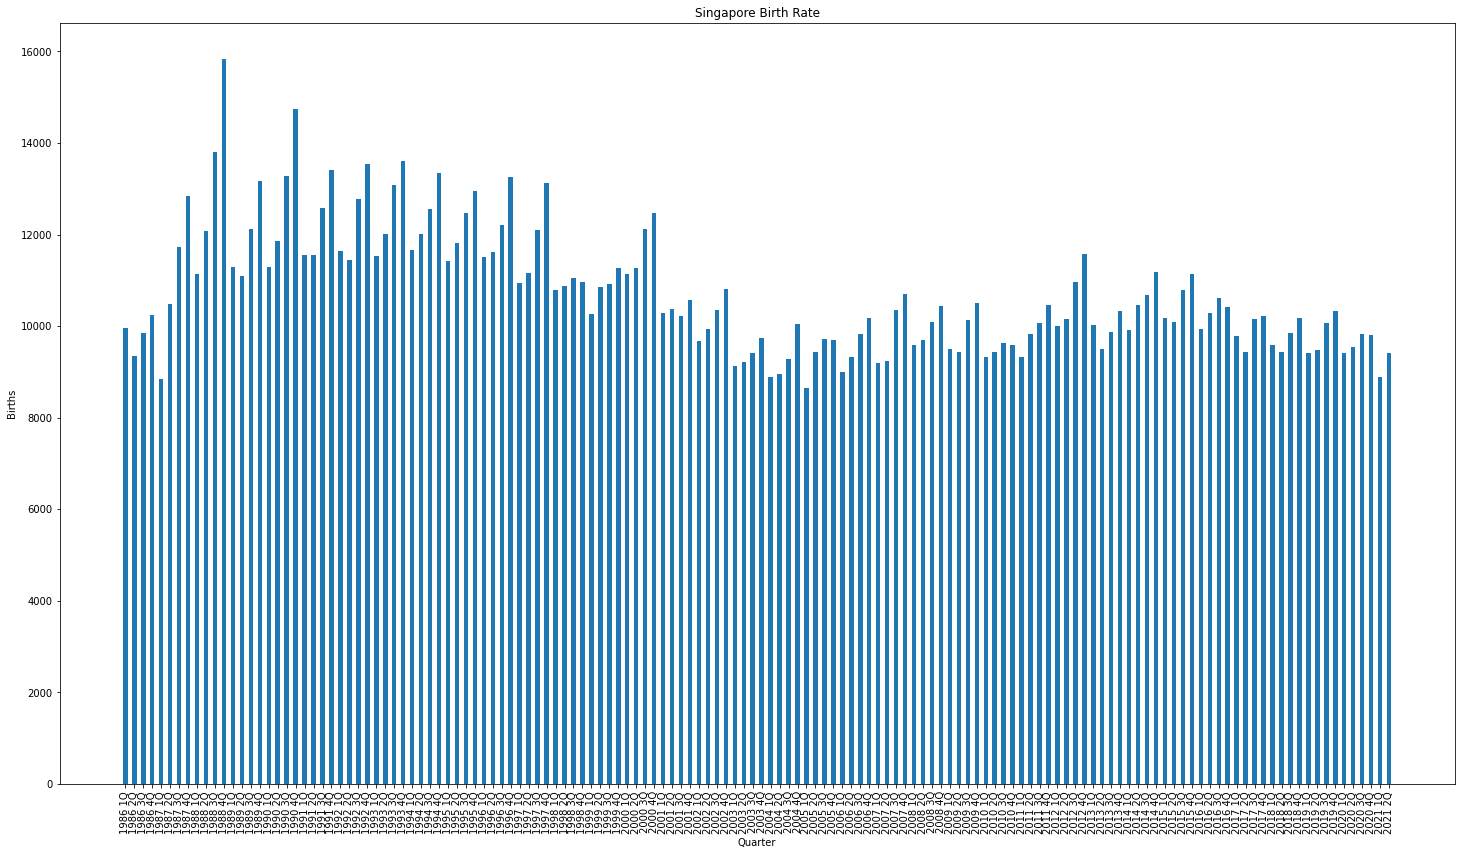

In [17]:
fig, ax = plt.subplots(figsize=(25,14))
bar_width = 0.5
ax.bar(births_df.Quarter, births_df["Total Live-Births By Birth Order"], bar_width)
ax.set_xlabel('Quarter')
ax.set_ylabel('Births')
ax.set_title('Singapore Birth Rate')
ax.set_xticklabels(births_df.index, Rotation=90)

In [7]:
yearly_births = births_df.groupby([pd.Grouper(key="Date", freq="Y")])["Total Live-Births By Birth Order"].sum()

yearly_births_df = pd.DataFrame(yearly_births)
yearly_births_df["Year"] = yearly_births.index

yearly_births_df.head()


,Total Live-Births By Birth Order,Year
Date,,
1986-12-31,39400,1986-12-31
1987-12-31,43889,1987-12-31
1988-12-31,52822,1988-12-31
1989-12-31,47669,1989-12-31
1990-12-31,51142,1990-12-31


Text(0, 0.5, 'Birth Rates')

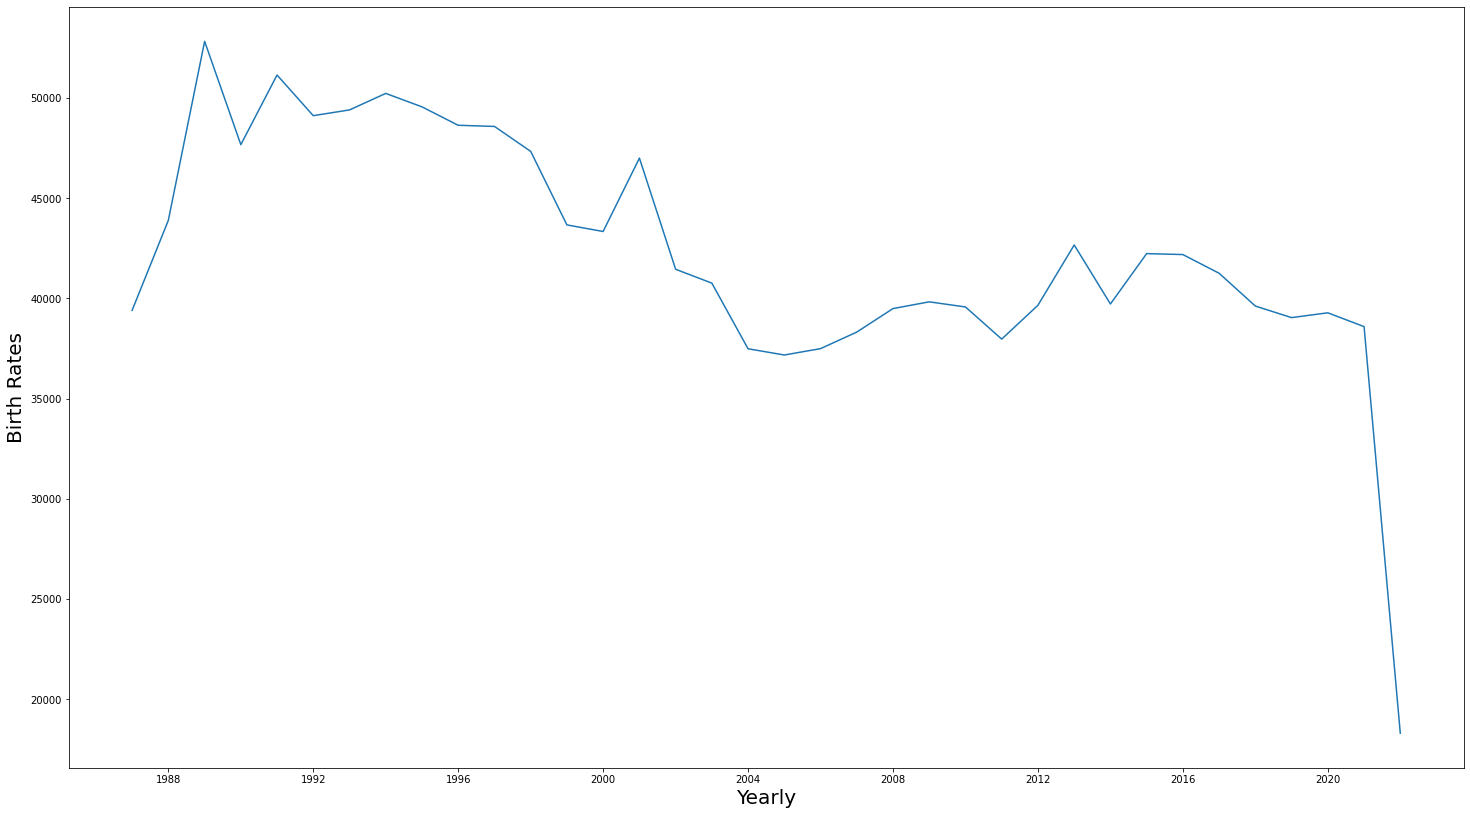

In [10]:
fig, ax = plt.subplots(figsize=(25, 14))
ax.plot(yearly_births_df.Year, yearly_births_df["Total Live-Births By Birth Order"])

ax.set_xlabel("Yearly", fontsize=20)
ax.set_ylabel("Birth Rates", fontsize=20)